In [1]:
%cd ../mmsegmentation

/home/leowang707/cv_final/mmsegmentation


In [2]:
import os
import subprocess

# Define the directory and file path
checkpoints_dir = "checkpoints"
pth_file = os.path.join(checkpoints_dir, "pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth")

# Check if the checkpoints directory exists
if not os.path.exists(checkpoints_dir):
    print("Creating checkpoints directory...")
    os.makedirs(checkpoints_dir)
else:
    print("checkpoints directory already exists.")

# Check if the .pth file exists
if not os.path.isfile(pth_file):
    print("Downloading pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth...")
    subprocess.run([
        "wget", 
        "https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth", 
        "-P", checkpoints_dir
    ])
else:
    print("File already exists. Skipping download.")

checkpoints directory already exists.
File already exists. Skipping download.


In [3]:
import numpy as np
import mmcv
import torch
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

In [4]:
import torch
print(torch.__version__)

2.3.0+cu118


In [5]:
config_file = 'configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_file = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

In [6]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')

/home/leowang707/cv_final/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


In [7]:
# test a single image
img = '../notebooks/image1.jpg'
img_name = os.path.splitext(os.path.basename(img))[0]
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)
result = inference_model(model, img)

/usr/local/lib/python3.8/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


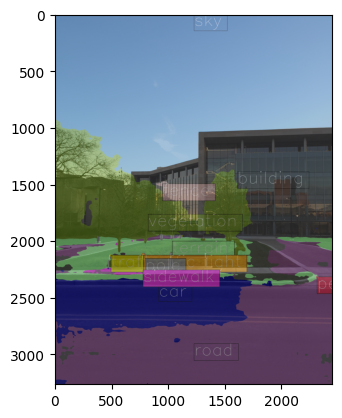

In [8]:
# show the results
vis_result = show_result_pyplot(model, img, result, show=False)
plt.imshow(vis_result)

In [9]:
# Ensure the directory exists
save_dir = f'../notebooks/SETR_result/{img_name}'
os.makedirs(save_dir, exist_ok=True)

# Extract the mask
# Access the pred_sem_seg attribute from the result object
mask = result.pred_sem_seg.data[0].cpu().numpy()

# Print out unique class indices in the mask
unique_classes = np.unique(mask)
print("Unique classes in the mask:", unique_classes)

# Define Cityscapes class labels using model.dataset_meta['classes']
# Extract class labels from model.dataset_meta['classes']
class_labels = model.dataset_meta['classes']

# Define Cityscapes class labels using model.dataset_meta['classes']
cityscapes_labels = {class_id: class_labels[class_id] for class_id in unique_classes}

# Save individual masks for each class and create label data
label_data = []
for class_id in unique_classes:
    class_mask = (mask == class_id).astype(np.uint8) * 255  # Convert to 8-bit image
    save_path = os.path.join(save_dir, f'mask_class_{class_id}.png')
    mmcv.imwrite(class_mask, save_path)
    label = cityscapes_labels.get(class_id, 'unknown')
    label_data.append(f"Label ID: {class_id}, Category: {label}")

# Save label data as a text file
labels_file = os.path.join(save_dir, 'image_categories.txt')
with open(labels_file, 'w') as f:
    for label_info in label_data:
        f.write(f"{label_info}\n")

print(f"Files saved to: {save_dir}")

Unique classes in the mask: [ 0  1  2  4  5  6  7  8  9 10 11 13]
Files saved to: ../notebooks/SETR_result/image1


In [ ]:
# Clear folder
import shutil
# Define the folder path you want to delete
folder_to_delete = '../notebooks/SETR_result'

# Check if the folder exists and delete it
if os.path.exists(folder_to_delete):
    shutil.rmtree(folder_to_delete)
    print(f"Folder '{folder_to_delete}' has been deleted.")
else:
    print(f"Folder '{folder_to_delete}' does not exist.")